In [84]:
import numpy as np
import pandas as pd
import math
from sklearn import svm
import matplotlib.pyplot as plt

In [102]:
# df1 = pd.read_csv('binclass.txt', header=None, names=['feature1','feature2','class'])
df1 = pd.read_csv('binclass.txt', header=None)
df2 = pd.read_csv('binclassv2.txt', header=None)

In [103]:
df1.columns = ['Feature_1', 'Feature_2','Class']
df2.columns = ['Feature_1', 'Feature_2','Class']

### Plotting the dataset from files 'binclass.txt' and 'binclassv_2.txt'

Text(0.5,1,'Filename-binclass.txt')

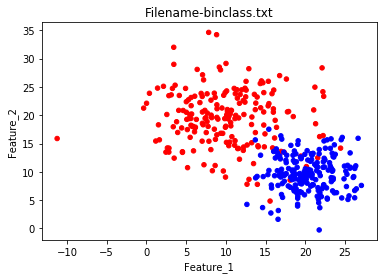

In [109]:
df1.plot.scatter('Feature_1', 'Feature_2', c=df1['Class'].apply(lambda x: 'red' if x is 1 else 'blue'))
plt.title('Filename-binclass.txt')

Text(0.5,1,'Filename-binclassv2.txt')

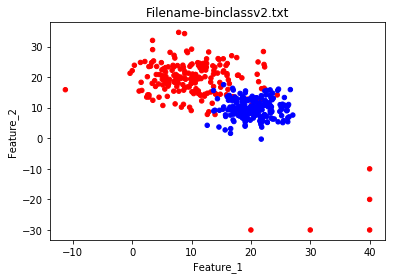

In [110]:
df2.plot.scatter('Feature_1', 'Feature_2', c=df1['Class'].apply(lambda x: 'red' if x is 1 else 'blue'))
plt.title('Filename-binclassv2.txt')

In [138]:
# defining few functions
# ----------------------
# Finding mean of the both classes
def mean(elements):
    return sum(elements)/float(len(elements))

# Finding standard Deviation of both classes
def variance(elements):
    mu = mean(elements)
    variance = sum([pow(x-mu,2) for x in elements])/float(len(elements))
    return variance

# Finding the summary of the dataset (mean and variance)
def summarize(dataset):
    summaries = [(mean(attribute), variance(attribute)) for attribute in zip(*dataset)]
    del summaries[-1]
    return summaries 

In [161]:
#Creating Summary of attribute parameters(mean and variance) for the file 'binclass.txt'
dataset = []
for i in range(400):
    dataset.append(list(df1.loc[i]))
# Summary of positive class examples
d1 = summarize(dataset[:200])
# Summary of negetive class examples
d2 = summarize(dataset[200:])

# Mean of positive examples
file1_d1_mu_positive = (d1[0][0], d1[1][0])
# Variance of positive examples
file1_d1_variance_positive = (d1[0][1]+d1[1][1])/2
print("For Positive class, Mean =",file1_d1_mu_positive,"and Variance=",file1_d1_variance_positive)

# Mean of Negative examples
file1_d2_mu2_negetive = (d2[0][0], d2[1][0])
# Variance of negetive examples
file1_d2_variance2_negetive = (d2[0][1]+d2[1][1])/2
print("For Negetive class, Mean =",file1_d2_mu2_negetive,"and Variance=",file1_d2_variance2_negetive)

# Variance of both the classes
print("Variance of both classes=", (file1_d1_variance_positive+file1_d2_variance2_negetive)/2)

For Positive class, Mean = (10.011457635000005, 19.549524499999993) and Variance= 26.60589653084015
For Negetive class, Mean = (20.324890000000003, 9.687995749999999) and Variance= 9.500608154947216
Variance of both classes= 18.053252342893682


In [162]:
#Creating Summary of attribute parameters(mean and variance) for the file 'binclass.txt'
dataset = []
for i in range(400):
    dataset.append(list(df2.loc[i]))
# Summary of positive class examples
d1 = summarize(dataset[:200])
# Summary of negetive class examples
d2 = summarize(dataset[200:])

# Mean of positive examples
file2_d1_mu_positive = (d1[0][0], d1[1][0])
# Variance of positive examples
file2_d1_variance_positive = (d1[0][1]+d1[1][1])/2
print("For Positive class, Mean =",file2_d1_mu_positive,"and Variance=",file2_d1_variance_positive)

# Mean of Negative examples
file2_d2_mu2_negetive = (d2[0][0], d2[1][0])
# Variance of negetive examples
file2_d2_variance2_negetive = (d2[0][1]+d2[1][1])/2
print("For Negetive class, Mean =",file2_d2_mu2_negetive,"and Variance=",file2_d2_variance2_negetive)

# Variance of both the classes
print("Variance of both classes=", (file2_d1_variance_positive+file2_d2_variance2_negetive)/2)

For Positive class, Mean = (10.574983635000002, 18.55690049999999) and Variance= 57.385938806281125
For Negetive class, Mean = (20.324890000000003, 9.687995749999999) and Variance= 9.500608154947216
Variance of both classes= 33.44327348061417


### Plotting decision boundary using generative classification

In [159]:
def d1_decision_boundary_generative(points):
    result = []
    for p in points:
        diff_positive = (p - mu_positive).reshape((d1_D, 1))
        diff_negative = (p - d1_negative_class_mean_mle).reshape((d1_D, 1))
        postive_vote = np.matmul(diff_positive.T, diff_positive)
        negative_vote = np.matmul(diff_negative.T, diff_negative)
        postive_vote /= d1_sigma_squared_positive
        negative_vote /= d1_sigma_squared_negative
        result.append(postive_vote - negative_vote)
    return np.array(result)

In [160]:
X = df1.values[:,:-1]
Y = df1.values[:, 2]
step = 1
# X - some data in 2dimensional np.array

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, step),
                     np.arange(y_min, y_max, step))

# here "model" is your model's prediction (classification) function
Z = d1_decision_boundary_generative(np.c_[xx.ravel(), yy.ravel()]) 

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, [0], colors='black')
plt.axis('off')

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=np.vectorize(lambda x: colors[x])(Y), cmap=plt.cm.Paired)
plt.savefig('binclass_generative_different_variance.png')

NameError: name 'd1_positive_class_mean_mle' is not defined